In [1]:
# Import Pytorch 
import torch 
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#
print("GPU avaiable: {}".format(torch.cuda.is_available()))

GPU avaiable: True


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 

In [3]:
if torch.cuda.is_available():
    device = 'cuda'
    print('device : cuda')
else:
    device = 'cpu'
    print('device : cpu')

device : cuda


In [4]:
# transform to a pytorch tensors 
# normalize our values between -1 and +1
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize( (0.5,), (0.5,) ) ])

In [5]:
# Load data & use transform when loading data 
# https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST
trainset  = torchvision.datasets.MNIST('mnist', train = True, download=True, transform=transform)

testset = torchvision.datasets.MNIST('mnist', train=False, download=False, transform=transform)

In [6]:
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [7]:
print(trainset.data[0].shape)
torch.set_printoptions(linewidth=160)
print(trainset.data[0])

torch.Size([28, 28])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 

In [8]:
def imgshow(title="", image=None, size=6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

/home/goku/anaconda3/envs/clonecv/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/goku/anaconda3/envs/clonecv/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


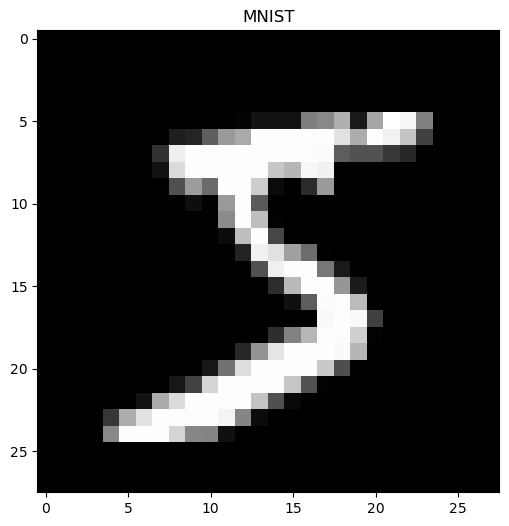

In [9]:
# convert the image to numpy array
image = trainset.data[0].numpy()
imgshow("MNIST", image)

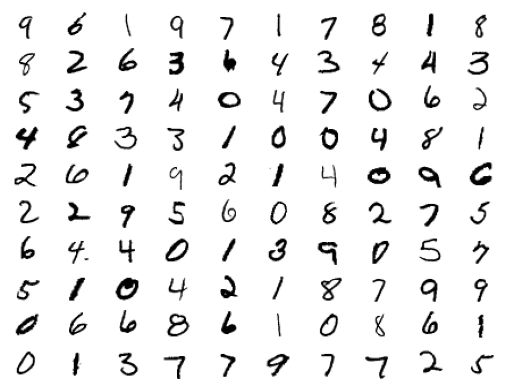

In [10]:
# view 50 first images of dataset

def show_image(num=100):
    figure = plt.figure()
    for index in range(1, num+1):
        plt.subplot(10,10,index)
        plt.axis('off')
        ran_num =np.random.randint(1,60000)
        plt.imshow(trainset.data[ran_num], cmap='gray_r')
show_image(num=100)

In [11]:
# data loader  
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=0)

testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=0)

In [12]:
dataiter = iter(trainloader)
image, labels = next(dataiter)

print(image.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [13]:
# pytorch Image plotting tool 

# show image
def imageshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
# get some random training images
dataiter = iter(trainloader)
image, labels = next(dataiter)

imageshow(torchvision.utils.make_grid(image))

# print(' '.join('%s' % labels[j].numpy() for j in range(128)))
print(' '.join(map(str,(labels[j].numpy() for j in range(128)))),end=)

SyntaxError: invalid syntax (4179248626.py, line 17)

In [14]:
# this is the bath that is feed into NN, get the loss, apply backpropagation using SGD


In [15]:
# Build CNN Model 
# 28x28x1 -- 32x 3x3x1 -- 26x26x32  : s=1 p=0
# 26x26x32 -- 64x 3x3x1 -- 24x24x64 : s=1 p=0
# 24x24x64 -- MP -- 12x12x64
# 12x12x64 -- 9216 - 128
# 128 -- 10

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,32,3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(64*12*12, 128)
        self.fc2 = nn.Linear(128,10)
        
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        # here we reshape the tensor to flatten it
        x = x.view(-1,64*12*12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x 
    
# send the model to cuda
net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [16]:
# loss function
criterion = nn.CrossEntropyLoss()
# Optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [17]:
# Training 

epochs =10

# logs
epochs_log = []
loss_log = []
accuracy_log = []

for epoch in range(epochs):
    print(f'Starting Epoch: {epoch+1}...')
    running_loss = 0.0
    
    # batch dataloader
    for i, data in enumerate(trainloader,0):
        inputs, labels = data
        
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        # Forward -->  backprop + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels) # diff result and predictions
        loss.backward()
        optimizer.step()
        
        # print details 
        running_loss += loss.item()
        if i%50 == 49:
            correct = 0 # hold correct prediction
            total = 0   # hold count labels iterated
            
            # for every 50 mini batch
            with torch.no_grad():
                # iterate testloader
                for data in testloader:
                    images, labels = data
                    
                    images = images.to(device)
                    labels = labels.to(device)
                    
                    outputs = net(images) # FP
                    
                    _, predicted = torch.max(outputs.data, dim=1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                    
                accuracy = 100 * correct /total
                epoch_num = epoch + 1
                actual_loss = running_loss /50
                print(f'Epoch: {epoch_num}, mini-batch completed: {(i+1)}, Loss:{actual_loss:.3f}, Test Accuracy= {accuracy:.3f}%')
                running_loss = 0.0
                
    # log for each epoch
    epochs_log.append(epoch_num)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)

print("Finished Training")

Starting Epoch: 1...
Epoch: 1, mini-batch completed: 50, Loss:2.259, Test Accuracy= 52.880%
Epoch: 1, mini-batch completed: 100, Loss:2.052, Test Accuracy= 73.860%
Epoch: 1, mini-batch completed: 150, Loss:1.448, Test Accuracy= 78.760%
Epoch: 1, mini-batch completed: 200, Loss:0.760, Test Accuracy= 85.640%
Epoch: 1, mini-batch completed: 250, Loss:0.542, Test Accuracy= 87.490%
Epoch: 1, mini-batch completed: 300, Loss:0.444, Test Accuracy= 88.390%
Epoch: 1, mini-batch completed: 350, Loss:0.390, Test Accuracy= 89.320%
Epoch: 1, mini-batch completed: 400, Loss:0.384, Test Accuracy= 89.250%
Epoch: 1, mini-batch completed: 450, Loss:0.373, Test Accuracy= 90.200%
Starting Epoch: 2...
Epoch: 2, mini-batch completed: 50, Loss:0.346, Test Accuracy= 90.120%
Epoch: 2, mini-batch completed: 100, Loss:0.329, Test Accuracy= 91.320%
Epoch: 2, mini-batch completed: 150, Loss:0.324, Test Accuracy= 91.070%
Epoch: 2, mini-batch completed: 200, Loss:0.320, Test Accuracy= 91.530%
Epoch: 2, mini-batch com

In [18]:
PATH = './mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH)

In [24]:
# Create an instance of the model and move it (memory and operations) to the CUDA device.
net = Net()
net.to(device)

# Load weights from the specified path
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [26]:
## Let's forward propagate one mini-batch and get the predicted outputs
# We use the Python function iter to return an iterator for our train_loader object
test_iter = iter(testloader)

# We use next to get the first batch of data from our iterator
images, labels = next(test_iter)

# Move our data to GPU
images = images.to(device)
labels = labels.to(device)

outputs = net(images)

# Get the class predictions using torch.max
_, predicted = torch.max(outputs, 1)

# Print our 128 predictions
print('Predicted: ', ''.join('%1s' % predicted[j].cpu().numpy() for j in range(128)))

Predicted:  72104149590690159734966540740131347271211742351244635560419578937464307029173297762784736136931417696054992194873974449254767905


In [27]:
correct = 0 
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.3}%')

Accuracy of the network on the 10000 test images: 98.2%


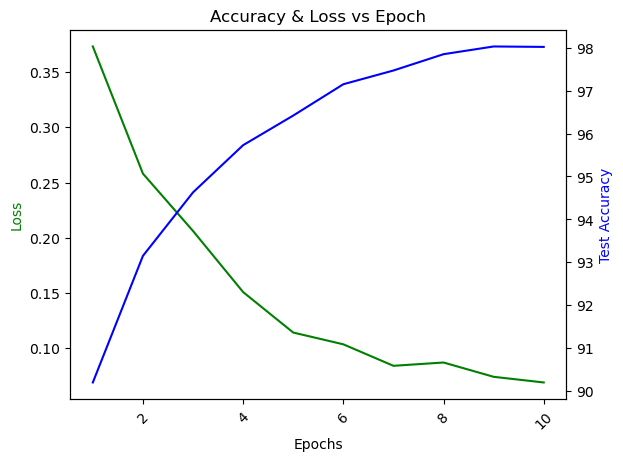

In [29]:
# To create a plot with secondary y-axis we need to create a subplot
fig, ax1 = plt.subplots()

# Set title and x-axis label rotation
plt.title("Accuracy & Loss vs Epoch")
plt.xticks(rotation=45)

# We use twinx to create a plot a secondary y axis
ax2 = ax1.twinx()

# Create plot for loss_log and accuracy_log
ax1.plot(epochs_log, loss_log, 'g-')
ax2.plot(epochs_log, accuracy_log, 'b-')

# Set labels
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Test Accuracy', color='b')

plt.show()